**Table of contents**<a id='toc0_'></a>    
- 1. [Proyecto tarifas Megaline](#toc1_)    
  - 1.1. [Descripción del proyecto](#toc1_1_)    
  - 1.2. [Descripción de datos](#toc1_2_)    
    - 1.2.1. [Descripción de users_data](#toc1_2_1_)    
    - 1.2.2. [Descripción de calls_data](#toc1_2_2_)    
    - 1.2.3. [Descripción de internet_data](#toc1_2_3_)    
    - 1.2.4. [Descripción de messages_data](#toc1_2_4_)    
    - 1.2.5. [Descripción de plans_data](#toc1_2_5_)    
    - 1.2.6. [Conclusiones intermedias](#toc1_2_6_)    
  - 1.3. [Procesamiento de datos](#toc1_3_)    
    - 1.3.1. [Preprocesamiento de users_data](#toc1_3_1_)    
    - 1.3.2. [Preprocesamiento de calls_data](#toc1_3_2_)    
    - 1.3.3. [Preprocesamiento de internet_data](#toc1_3_3_)    
    - 1.3.4. [Preprocesamiento de messages_data](#toc1_3_4_)    
    - 1.3.5. [Preprocesamiento de plans_data](#toc1_3_5_)    
    - 1.3.6. [Conclusiones intermedias](#toc1_3_6_)    
  - 1.4. [Tablas de consumo por usuario por mes](#toc1_4_)    
    - 1.4.1. [Consumo de llamadas](#toc1_4_1_)    
    - 1.4.2. [Consumo de internet](#toc1_4_2_)    
    - 1.4.3. [Consumo de mensajes](#toc1_4_3_)    
    - 1.4.4. [Consumo de todos los servicios](#toc1_4_4_)    
    - 1.4.5. [Conclusiones intermedias](#toc1_4_5_)    
  - 1.5. [Cálculo de ingresos mensuales por cada usuario](#toc1_5_)    
    - 1.5.1. [Cálculo de ingreso mensual del excedente por cada usuario](#toc1_5_1_)    
    - 1.5.2. [Cálculo del ingreso total por cada usuario](#toc1_5_2_)    
    - 1.5.3. [Conclusiones intermedias](#toc1_5_3_)    
  - 1.6. [Análisis de datos](#toc1_6_)    
    - 1.6.1. [Consumo de llamadas entre usuarios de surf y ultimate](#toc1_6_1_)    
    - 1.6.2. [Consumo de internet entre usuarios de surf y ultimate](#toc1_6_2_)    
    - 1.6.3. [Consumo de mensajes de texto entre usuarios de surf y ultimate](#toc1_6_3_)    
    - 1.6.4. [Ingreso de usuarios de surf y ultimate](#toc1_6_4_)    
    - 1.6.5. [Ingreso de usuarios del estado de New York/ New Jersey y los demás](#toc1_6_5_)    
    - 1.6.6. [Conclusiones intermedias](#toc1_6_6_)    
  - 1.7. [Prueba las hipótesis](#toc1_7_)    
    - 1.7.1. [Primera hipótesis](#toc1_7_1_)    
    - 1.7.2. [Segunda hipótesis](#toc1_7_2_)    
    - 1.7.3. [Conclusiones intermedias](#toc1_7_3_)    
  - 1.8. [Conclusiones generales](#toc1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Proyecto tarifas Megaline](#toc0_)

## 1.1. <a id='toc1_1_'></a>[Descripción del proyecto](#toc0_)

El operador de telecomunicaciones, Megaline, ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. Se requiere determiniar cuál plan genera más ingresos para ajustar el presupuesto de publicidad. Se tienen inicialmente los datos de 500 clientes de Megaline, del año 2018. Se va a analizar el comportamiento y determinar cuál tarifa genera más ingresos. 

**Descripción de tarifas**

Estas son los límites de cada plan y los costos si se exceden del límite:

**Surf**

- Pago mensual: 20\$
- 500 minutos al mes, 50 SMS
- 15 GB de datos

Si se exceden los límites del paquete:
- 1 minuto: 3 centavos
- 1 SMS: 3 centavos
- 1 GB de datos: 10\$

**Ultimate**
- Pago mensual: 70\$
- 3000 minutos al mes, 1000 SMS
- 30 GB de datos

Si se exceden los límites del paquete:
- 1 minuto: 1 centavo
- 1 SMS: 1 centavo
- 1 GB de datos: 7\$

**Rutas de los archivos:**
- /datasets/megaline_calls.csv
- /datasets/megaline_internet.csv
- /datasets/megaline_messages.csv
- /datasets/megaline_plans.csv
- /datasets/megaline_users.csv

## 1.2. <a id='toc1_2_'></a>[Descripción de datos](#toc0_)

Se importan las librerías

In [32]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se importan los datos de los 5 archivos

In [33]:
users_data = pd.read_csv('datasets/megaline_users.csv')
calls_data = pd.read_csv('datasets/megaline_calls.csv')
internet_data = pd.read_csv('datasets/megaline_internet.csv')
messages_data = pd.read_csv('datasets/megaline_messages.csv')
plans_data = pd.read_csv('datasets/megaline_plans.csv')

### 1.2.1. <a id='toc1_2_1_'></a>[Descripción de users_data](#toc0_)

Se revisará la información en users_data

In [34]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


No hay valores ausentes excepto en churn_date. Los valores ausentes en esta columna indicarían que el aun usaba el servicio al momento de recolectar estos datos. Hay 34 usuarios que han dejado el servicio.

In [35]:
users_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


- Se cambiara el formato de strings a date para reg_date.
- Se obtendrá una columna nueva con los valores del mes de reg_date.

### 1.2.2. <a id='toc1_2_2_'></a>[Descripción de calls_data](#toc0_)

In [36]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


No hay valores ausentes en calls_data

In [37]:
calls_data.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


- Se cambiará el formato de strings a date para call_date
- Hay llamadas con duración de cero minutos, quizás debido a llamadas perdidas realizadas. Como se van a contar las llamadas, estas que no generan ingresos no nos interesa mucho, se van a eliminar.
- Se creará una columna con el mes del call_date, para obtener el total de llamadas y duración por mes.
- Los datos de duration  se redondearán al entero mayor para los calculos a realizar

### 1.2.3. <a id='toc1_2_3_'></a>[Descripción de internet_data](#toc0_)

In [38]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


No hay valores ausentes en internet_data

In [39]:
internet_data.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


- Se cambiará el formato de strings a date para session_date
- Hay entradas con megas usados igual cero, quizás debido a perdida de conexión o la página no cargó. No nos interesan este tipo de datos, se va a tratar de eliminarlos.
- Se creará una columna con el mes del session_date, para obtener el total por mes por usuario.
- Los datos de mb_used se convertirán a Gb y se redondearán entero mayor para los calculos a realizar.

### 1.2.4. <a id='toc1_2_4_'></a>[Descripción de messages_data](#toc0_)

In [40]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [41]:
messages_data.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


- Se cambiará el formato de strings a date para message_date
- Se creará una columna con el mes del message_date, para obtener el total por mes por usuario.

### 1.2.5. <a id='toc1_2_5_'></a>[Descripción de plans_data](#toc0_)

In [42]:
plans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [43]:
plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- Solo hay dos planes, por lo que solo tenemos dos filas de datos.
- Los límites para cada plan se obtendrán de esta tabla

### 1.2.6. <a id='toc1_2_6_'></a>[Conclusiones intermedias](#toc0_)

- Se observaron los datos de las 5 tablas proporcionadas de los usuarios, llamadas, internet, mensajes y plan. No casi no hubiero datos ausentes que hayan que rellenar.
- En la única tabla con datos ausentes, la columna de `churn_date` en users_data, estos nos indican los usuarios que aun usaban el servicio en el 2018.
    - Se van a rellenar con una fecha del 2019, para que no afecte los datos del 2018.
- En todas las tablas, excepto la de plans_data, se convertirán las columnas de fechas en variables de datetime.

## 1.3. <a id='toc1_3_'></a>[Procesamiento de datos](#toc0_)

Se guardará una copia de los dataframes originales, para trabajar con copias y no perder las tablas iniciales.

In [44]:
calls_data_original = calls_data.copy()
internet_data_original = internet_data.copy()
messages_data_original = messages_data.copy()
plans_data_original = plans_data.copy()
users_data_original = users_data.copy()

### 1.3.1. <a id='toc1_3_1_'></a>[Preprocesamiento de users_data](#toc0_)

Se procederá a cambiar a tipo de fecha las columnas de `churn_date` and `reg_date`

In [45]:
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d')

Se comprueba si el cambio de formatos se realizó correctamente

In [46]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Vamos a revisar el rango de fechas de `reg_date` y `churn_date`

In [47]:
print(f'Minima fecha de reg_date {users_data["reg_date"].min()}')
print(f'Máxima fecha de reg_date {users_data["reg_date"].max()}')

Minima fecha de reg_date 2018-01-01 00:00:00
Máxima fecha de reg_date 2018-12-31 00:00:00


In [48]:
print(f'Minima fecha de churn_date {users_data["churn_date"].min()}')
print(f'Máxima fecha de churn_date {users_data["churn_date"].max()}')

Minima fecha de churn_date 2018-07-31 00:00:00
Máxima fecha de churn_date 2018-12-31 00:00:00


Todas las fechas son del año 2018, solo necesitamos obtener el mes, ya que el año es el mismo.

Vamos a rellenar los ausentes con de churn_data con una fecha del 2019.

In [49]:
users_data['churn_date'] = users_data['churn_date'].fillna(pd.to_datetime('2019-01-01'))

In [50]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Ya no quedan valores ausentes.

Cremos una columna con el equivalente del mes de `reg_date` y  `churn_date`. Para `churn_date`, si el año es 2019, se reemplazará con cero en `churn_month`.

In [51]:
users_data['reg_month'] = users_data['reg_date'].dt.month
users_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,5


In [52]:
users_data['churn_month'] = users_data['churn_date'].dt.month
users_data.loc[users_data['churn_date'].dt.year == 2019,'churn_month'] = 0
users_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,12,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,10,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,1,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,5,0


### 1.3.2. <a id='toc1_3_2_'></a>[Preprocesamiento de calls_data](#toc0_)

Procedemos a cambiar el formato de strings a date para `call_date`

In [53]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')

Se comprueba si el cambio de formatos se realizó correctamente

In [54]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Continuamos revisando la cantidad de llamadas con duración de cero minutos. Se va a obtener el número de llamadas y su relación con todos los datos disponibles

In [55]:
duration_zeros = calls_data.query('duration == 0')
print(f'Hay {len(duration_zeros)} filas con duración de cero')
print(f'Esto representa el {len(duration_zeros)/len(calls_data):.2%}')

Hay 26834 filas con duración de cero
Esto representa el 19.48%


Casi el 20% de las llamadas tienen 0 minutos de duración. Como no nos ayudan a estudiar los ingresos que generán los planes, vamos a eliminarlas.

In [56]:
calls_data = calls_data.query('duration != 0')

Verificamos si ya no quedan datos mb_used igual a cero.

In [57]:
calls_data['duration'].min()

0.01

Ya que no quedan llamadas con cero de duración, vamos a crear una columna con los datos de duration pero redondeados al entero mayor y revisamos unas filas para verificar.

In [58]:
calls_data['duration_int'] = np.ceil(calls_data['duration']).astype(int)
calls_data.head()

,id,user_id,call_date,duration,duration_int
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5


Se creará una columna con el mes de `call_date` para luego poder agrupar por id del usuario y mes de la llamada.

In [59]:
calls_data['call_month'] = calls_data['call_date'].dt.month
calls_data.head()

,id,user_id,call_date,duration,duration_int,call_month
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,14,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,6,12
4,1000_380,1000,2018-12-30,4.22,5,12


### 1.3.3. <a id='toc1_3_3_'></a>[Preprocesamiento de internet_data](#toc0_)

Procedemos a cambiar el formato de strings a date para `session_date`

In [60]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')

Se comprueba si el cambio de formatos se realizó correctamente

In [61]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Vamos a averiguar la cantidad de filas que tienen datos en ceros para mb_used y cuanto representan de los datos en total.

In [62]:
mb_zeros = internet_data.query('mb_used == 0')
print(f'Hay {len(mb_zeros)} filas con mb usados igual a cero')
print(f'Esto representa el {len(mb_zeros)/len(internet_data):.2%}')

Hay 13747 filas con mb usados igual a cero
Esto representa el 13.11%


Un poco más del 13% de los datos tienen como megas usados con valor cero. No son tantos, ni nos interesan estos datos en nuestro análisis de ingresos, por lo que se eliminarán.

In [63]:
internet_data = internet_data.query('mb_used != 0')

Verificamos si ya no quedan datos mb_used igual a cero.

In [64]:
internet_data['mb_used'].min()

0.01

Vamos a crear una columna para el consumo en gb.

In [65]:
internet_data['gb_used'] = internet_data['mb_used']/1024

Ahora con filas sin valores a ceros, se creará una columna con el mes de `session_date`

In [66]:
internet_data['session_month'] = internet_data['session_date'].dt.month
internet_data.head()

,id,user_id,session_date,mb_used,gb_used,session_month
0,1000_13,1000,2018-12-29,89.86,0.087754,12
2,1000_379,1000,2018-12-28,660.40,0.644922,12
3,1000_413,1000,2018-12-26,270.99,0.264639,12
4,1000_442,1000,2018-12-27,880.22,0.859590,12
5,1001_0,1001,2018-08-24,284.68,0.278008,8


### 1.3.4. <a id='toc1_3_4_'></a>[Preprocesamiento de messages_data](#toc0_)

Se transformará la columna de `message_date` a formato de fecha.

In [67]:
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')

Se comprueba si el cambio de formatos se realizó correctamente

In [68]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Ya con las columna de fechas con formato correcto, se creará una columna con el mes de `message_date` para luego poder agrupar por id del usuario y mes del mensaje.

In [69]:
messages_data['message_month'] = messages_data['message_date'].dt.month
messages_data.head()

,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


### 1.3.5. <a id='toc1_3_5_'></a>[Preprocesamiento de plans_data](#toc0_)

Para esta tabla, para facilitar su uso, tomaremos el plan_name como el índice. 

In [70]:
plans_data = plans_data.set_index('plan_name')
plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
plan_name,,,,,,,
surf,50,15360,500,20,10,0.03,0.03
ultimate,1000,30720,3000,70,7,0.01,0.01


### 1.3.6. <a id='toc1_3_6_'></a>[Conclusiones intermedias](#toc0_)

- Se realizó el preprocesamiento de tablas de users, calls, internet y messages.
    - Las columnas de fechas se convirtieron en variable tipo datetime.
    - Se eliminaron algunas filas donde la duración o el consumo, dieron valores de cero.
- Para plans, se seteó como index a una de sus columnas, para facilitar la busqueda de datos.

## 1.4. <a id='toc1_4_'></a>[Tablas de consumo por usuario por mes](#toc0_)

### 1.4.1. <a id='toc1_4_1_'></a>[Consumo de llamadas](#toc0_)

Ahora que ya tenemos la columna del mes de la llamadas, vamos a agrupar por mes y por usuario. Primero vamos a contar las llamadas por id de usuario y mes.

In [71]:
calls_by_id_month = calls_data.pivot_table(values='duration_int', index=['user_id','call_month'], 
                                            aggfunc=['count','sum']).reset_index()
calls_by_id_month.head()

,user_id,call_month,count,sum
,,,duration_int,duration_int
0,1000,12,16,124
1,1001,8,22,182
2,1001,9,38,315
3,1001,10,47,393
4,1001,11,49,426


Cambiamos el nombre de `call_month` a `month`.

In [72]:
calls_by_id_month.columns = calls_by_id_month.columns.set_levels(
                                                            ['count', 'sum', 'month', 'user_id']
                                                            , level=0)

In [73]:
calls_by_id_month.head(3)

,user_id,month,count,sum
,,,duration_int,duration_int
0,1000,12,16,124
1,1001,8,22,182
2,1001,9,38,315


### 1.4.2. <a id='toc1_4_2_'></a>[Consumo de internet](#toc0_)

A partir de la columna del mes de la sesión, vamos a agrupar por mes y por usuario.

In [74]:
internet_by_id_month = internet_data.pivot_table(values='gb_used', index=['user_id','session_month'], 
                                            aggfunc=['sum']).reset_index()
internet_by_id_month.head()

,user_id,session_month,sum
,,,gb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605


Ahora procedemos a redondear al entero mayor.

In [75]:
internet_by_id_month = np.ceil(internet_by_id_month).astype(int)
internet_by_id_month.head()

,user_id,session_month,sum
,,,gb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19


Cambiamos el nombre de `session_month` a `month`.

In [76]:
internet_by_id_month.columns = internet_by_id_month.columns.set_levels(
                                                            ['sum', 'month', 'user_id'], level=0)

In [77]:
internet_by_id_month.head(3)

,user_id,month,sum
,,,gb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14


### 1.4.3. <a id='toc1_4_3_'></a>[Consumo de mensajes](#toc0_)

Ahora se va a obtener la tabla con el conteo de mensajes enviados por usuario y mes.

In [78]:
messages_by_id_month = messages_data.pivot_table(values='id', index=['user_id','message_month'], 
                                            aggfunc=['count']).reset_index()
messages_by_id_month.head()

,user_id,message_month,count
,,,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


Cambiamos el nombre de `message_month` a `month`.

In [79]:
messages_by_id_month.columns = messages_by_id_month.columns.set_levels(
                                                            ['count', 'month', 'user_id'], level=0)

In [80]:
messages_by_id_month.head(3)

,user_id,month,count
,,,id
0,1000,12,11
1,1001,8,30
2,1001,9,44


### 1.4.4. <a id='toc1_4_4_'></a>[Consumo de todos los servicios](#toc0_)

Ahora nos encargamos de unir las 3 tablas de consumo, para tener la información de los usuarios en una sola.

In [81]:
monthly = calls_by_id_month.merge(internet_by_id_month, on=['user_id','month'], how='outer')
monthly

C:\Users\marie\AppData\Local\Temp\ipykernel_44492\3196875147.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  monthly = calls_by_id_month.merge(internet_by_id_month, on=['user_id','month'], how='outer')


user_id month        count          sum        
                   duration_int duration_int gb_used
0       1000    12         16.0        124.0     2.0
1       1001     8         22.0        182.0     7.0
2       1001     9         38.0        315.0    14.0
3       1001    10         47.0        393.0    22.0
4       1001    11         49.0        426.0    19.0
...      ...   ...          ...          ...     ...
2287    1349    10          NaN          NaN    13.0
2288    1349    11          NaN          NaN    17.0
2289    1349    12          NaN          NaN    13.0
2290    1361     5          NaN          NaN     2.0
2291    1407    11          NaN          NaN     1.0

[2292 rows x 5 columns]

In [82]:
monthly = monthly.merge(messages_by_id_month, on=['user_id','month'], how='outer')
monthly

C:\Users\marie\AppData\Local\Temp\ipykernel_44492\2063652900.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  monthly = monthly.merge(messages_by_id_month, on=['user_id','month'], how='outer')


user_id month        count          sum         count
                   duration_int duration_int gb_used    id
0       1000    12         16.0        124.0     2.0  11.0
1       1001     8         22.0        182.0     7.0  30.0
2       1001     9         38.0        315.0    14.0  44.0
3       1001    10         47.0        393.0    22.0  53.0
4       1001    11         49.0        426.0    19.0  36.0
...      ...   ...          ...          ...     ...   ...
2288    1349    11          NaN          NaN    17.0  72.0
2289    1349    12          NaN          NaN    13.0  61.0
2290    1361     5          NaN          NaN     2.0   2.0
2291    1407    11          NaN          NaN     1.0   1.0
2292    1482    10          NaN          NaN     NaN   2.0

[2293 rows x 6 columns]

Ahora los valores ausente de esta tabla vamos a llenarlos con ceros. Estos valores ausentes equivalen a servicios que el usuario no usó.

In [83]:
monthly=monthly.fillna(0)
monthly

user_id month        count          sum         count
                   duration_int duration_int gb_used    id
0       1000    12         16.0        124.0     2.0  11.0
1       1001     8         22.0        182.0     7.0  30.0
2       1001     9         38.0        315.0    14.0  44.0
3       1001    10         47.0        393.0    22.0  53.0
4       1001    11         49.0        426.0    19.0  36.0
...      ...   ...          ...          ...     ...   ...
2288    1349    11          0.0          0.0    17.0  72.0
2289    1349    12          0.0          0.0    13.0  61.0
2290    1361     5          0.0          0.0     2.0   2.0
2291    1407    11          0.0          0.0     1.0   1.0
2292    1482    10          0.0          0.0     0.0   2.0

[2293 rows x 6 columns]

Con estos datos, vamos a unirla con la tabla de user_data.

In [84]:
users_monthly = users_data.merge(monthly, on='user_id', how='left')
users_monthly.head()

C:\Users\marie\AppData\Local\Temp\ipykernel_44492\1763206419.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  users_monthly = users_data.merge(monthly, on='user_id', how='left')
C:\Users\marie\AppData\Local\Temp\ipykernel_44492\1763206419.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  users_monthly = users_data.merge(monthly, on='user_id', how='left')


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month,"(month, )","(count, duration_int)","(sum, duration_int)","(sum, gb_used)","(count, id)"
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,12,0,12.0,16.0,124.0,2.0,11.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8,0,8.0,22.0,182.0,7.0,30.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8,0,9.0,38.0,315.0,14.0,44.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8,0,10.0,47.0,393.0,22.0,53.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8,0,11.0,49.0,426.0,19.0,36.0


Se van a cambiar los nombres de algunas columnas

In [85]:
users_monthly = users_monthly.rename(columns = {
                                                ('month', ''):'month',
                                                ('count', 'duration_int'):'calls_count',
                                                ('sum', 'duration_int'): 'calls_sum',
                                                ('sum', 'gb_used'): 'internet_sum',
                                                ('count', 'id'): 'messages_count'
})

In [86]:
users_monthly.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month,month,calls_count,calls_sum,internet_sum,messages_count
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,12,0,12.0,16.0,124.0,2.0,11.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8,0,8.0,22.0,182.0,7.0,30.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8,0,9.0,38.0,315.0,14.0,44.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8,0,10.0,47.0,393.0,22.0,53.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8,0,11.0,49.0,426.0,19.0,36.0


### 1.4.5. <a id='toc1_4_5_'></a>[Conclusiones intermedias](#toc0_)

- Se crearon tablas de consumo por usuario por mes para:
    - Cantidad de llamadas 
    - Duración de las llamadas
    - Consumo de internet en Gb
    - Cantidad de mensajes enviados
- Se unieron estas tablas con la de users_data, ahora podemos calcular los ingresos por uso excedente.
- Se cambió los nombres de algunas columnas de esta tabla.

## 1.5. <a id='toc1_5_'></a>[Cálculo de ingresos mensuales por cada usuario](#toc0_)

### 1.5.1. <a id='toc1_5_1_'></a>[Cálculo de ingreso mensual del excedente por cada usuario](#toc0_)

De la tabla de `users_monthly` se va a calcular los ingresos por cada servicio. Se guardará en 3 columnas los ingresos extras por llamadas, internet y mensajes.

In [56]:
def calcular_ingreso_extra(row, servicio, limites, precios):
    # Esta función toma el servicio que se le especifique (llamadas, internet o mensajes)
    # y las columnas de límites y precios según corresponda
    # Luego con esto calcula el precio a pagar por cada fila.
    if row['plan'] == 'surf':
        if row[servicio] > limites['surf']:
            ingreso_extra = (row[servicio] - limites['surf'])*precios['surf']
        else:
            ingreso_extra =  0
    else:
        if row[servicio] > limites['ultimate']:
            ingreso_extra = (row[servicio] - limites['ultimate'])*precios['ultimate']
        else:
            ingreso_extra =  0
        
    return ingreso_extra

Para los tres tipos de ingreso debería funcionar este algoritmo, para comprobar, vamos a determinar el ingreso extra para un fila, cuyo plan es surf y tiene excedente en llamadas.

In [57]:
users_monthly.loc[25, ['plan','calls_sum']]

plan          surf
calls_sum    617.0
Name: 25, dtype: object

In [58]:
calcular_ingreso_extra(users_monthly.loc[25], 'calls_sum', plans_data['minutes_included'], plans_data['usd_per_minute'])

3.51

Ahora para un fila de alguien con plan ultimate sin excedente.

In [59]:
users_monthly.loc[28, ['plan','calls_sum']]

plan         ultimate
calls_sum       634.0
Name: 28, dtype: object

In [60]:
calcular_ingreso_extra(users_monthly.loc[28], 'calls_sum', plans_data['minutes_included'], plans_data['usd_per_minute'])

0

Los valores son correctos, procedemos a crear las columnas.

In [61]:
users_monthly['ingreso_calls']=users_monthly.apply(calcular_ingreso_extra, 
                    args=('calls_sum', plans_data['minutes_included'], plans_data['usd_per_minute']),
                    axis=1)
users_monthly['ingreso_internet']=users_monthly.apply(calcular_ingreso_extra, 
                    args=('internet_sum', plans_data['mb_per_month_included']/1024, plans_data['usd_per_gb']),
                    axis=1)
users_monthly['ingreso_messages']=users_monthly.apply(calcular_ingreso_extra, 
                    args=('messages_count', plans_data['messages_included'], plans_data['usd_per_message']),
                    axis=1)

In [62]:
users_monthly.sample(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month,month,calls_count,calls_sum,internet_sum,messages_count,ingreso_calls,ingreso_internet,ingreso_messages
1113,1236,Odell,Juarez,74,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,ultimate,2019-01-01,4,0,6.0,56.0,434.0,19.0,32.0,0.00,0.0,0.0
1100,1232,Elidia,Russell,64,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-07,surf,2019-01-01,4,0,8.0,68.0,635.0,16.0,0.0,4.05,10.0,0.0
1149,1245,Quinn,David,30,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-19,surf,2019-01-01,6,0,8.0,31.0,258.0,10.0,7.0,0.00,0.0,0.0


### 1.5.2. <a id='toc1_5_2_'></a>[Cálculo del ingreso total por cada usuario](#toc0_)

Ahora para el cálculo del ingreso total, solo quedaría sumar los ingresos extras por cada servicio más el plan.

In [63]:
def calcular_ingreso_total(row):
    if row['plan'] == 'surf':
        ingreso_total = row['ingreso_calls'] + row['ingreso_internet'] + row['ingreso_messages'] + 20
    else:
        ingreso_total = row['ingreso_calls'] + row['ingreso_internet'] + row['ingreso_messages'] + 70
    return ingreso_total

In [64]:
users_monthly['ingreso_total']=users_monthly.apply(calcular_ingreso_total, axis=1)

In [67]:
users_monthly.sample(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month,month,calls_count,calls_sum,internet_sum,messages_count,ingreso_calls,ingreso_internet,ingreso_messages,ingreso_total
1403,1302,Leonila,Morris,62,"Rochester, NY MSA",2018-01-21,surf,2019-01-01,1,0,11.0,54.0,480.0,23.0,68.0,0.00,80.0,0.54,100.54
1336,1284,Yuri,Odom,51,"Dayton-Kettering, OH MSA",2018-09-07,surf,2019-01-01,9,0,12.0,100.0,965.0,21.0,0.0,13.95,60.0,0.00,93.95
1886,1403,Jae,Gardner,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-06,ultimate,2019-01-01,2,0,6.0,34.0,260.0,20.0,0.0,0.00,0.0,0.00,70.00


### 1.5.3. <a id='toc1_5_3_'></a>[Conclusiones intermedias](#toc0_)

- En base a las columnas de consumo se calculó el ingreso por excedente, dependiendo del plan.
- Se obtuvo el total del ingreso, sumando el ingreso base con el ingreso por excedente de cada servicio.

## 1.6. <a id='toc1_6_'></a>[Análisis de datos](#toc0_)

Vamos a ver la relación entre la cantidad de usuarios que usan surf vs ultimate.

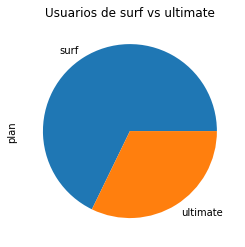

In [66]:
users_data['plan'].value_counts().plot.pie()
plt.title('Usuarios de surf vs ultimate')
plt.show()

Aproximadamente un poco más de un tercio de los usuarios disponibles han contratado con el plan de ultimate. La mayoría de contratos los tienen con el plan surf.

Ahora veamos la relación de usuarios que son del estado de New York - New Jersey, en comparación al resto

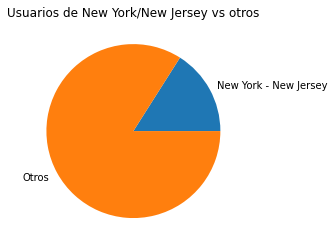

In [67]:
new_york_city = 'New York-Newark-Jersey City, NY-NJ-PA MSA'

new_york_count = (users_data['city'].values == new_york_city).sum()
no_new_york_count = (users_data['city'].values != new_york_city).sum()
plt.pie([new_york_count, no_new_york_count], labels = ['New York - New Jersey', 'Otros'])
plt.title('Usuarios de New York/New Jersey vs otros')
plt.show()

Aproximadamente una sexta parte de los usuarios son de New York - New Jersey. A pesar, este es el grupo con mayor cantidad de usuarios, las demás ciudades tiene menor cantidad.

In [68]:
users_data['city'].value_counts().sort_values(ascending=False).head()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
Name: city, dtype: int64

### 1.6.1. <a id='toc1_6_1_'></a>[Consumo de llamadas entre usuarios de surf y ultimate](#toc0_)

Vamos a encontrar algunos datos estadísticos de las llamadas. Se va a realizar esta presentación de datos algunas veces, así que definiré una función que resuma el proceso.

In [69]:
def show_basic_stats(lista_datos, nombres):
    summary = {}
    for datos, nombre in zip(lista_datos, nombres):
        summary[nombre] = [np.mean(datos),
                          np.var(datos),
                          np.std(datos)]
    print(pd.DataFrame(summary, index=['Media', 'Varianza', 'Desv. Estandar']))
    

In [70]:
calls_sum_surf = users_monthly.query('plan == "surf"')['calls_sum']
calls_sum_ultimate = users_monthly.query('plan == "ultimate"')['calls_sum']

In [71]:
show_basic_stats([calls_sum_surf, calls_sum_ultimate], ['Surf', 'Ultimate'])

                        Surf      Ultimate
Media             428.749523    430.450000
Varianza        54933.334591  57764.125278
Desv. Estandar    234.378614    240.341684


Aparentemente, la duración de las llamadas tanto para surf y ultimate tienen un media y desviación estandar similar.

Ahora compararemos visualmente el consumo entre los usuarios de ambos planes.

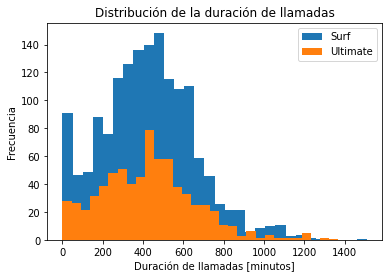

In [72]:
plt.hist(calls_sum_surf, bins=30)
plt.hist(calls_sum_ultimate, bins=30)
plt.legend(['Surf', 'Ultimate'])
plt.xlabel('Duración de llamadas [minutos]')
plt.ylabel('Frecuencia')
plt.title('Distribución de la duración de llamadas')
plt.show()

Hay cierta similitud en la forma de la distribución, se esperaba dado las medias y desviaciones parecidas. La frequencia es mayor en surf ya que la mayoría de los planes son de surf. Por otro lado, hay algunos datos con valor de cero, esto equivaldría a decir la cantidad de meses que algunos usuarios no hicieron llamadas.

In [73]:
zero_calls_surf = len(calls_sum_surf[calls_sum_surf==0])
print(f'==Para planes de surf==')
print(f'Cantidad de meses donde no se realizaron llamadas: {zero_calls_surf}')
print(f'Esto equivale al {zero_calls_surf/len(calls_sum_surf):.2%} de los datos')
print()
zero_calls_ultimate = len(calls_sum_ultimate[calls_sum_ultimate==0])
print(f'==Para planes de ultimate==')
print(f'Cantidad de meses donde no se realizaron llamadas: {zero_calls_ultimate}')
print(f'Esto equivale al {zero_calls_ultimate/len(calls_sum_ultimate):.2%} de los datos')

==Para planes de surf==
Cantidad de meses donde no se realizaron llamadas: 29
Esto equivale al 1.84% de los datos

==Para planes de ultimate==
Cantidad de meses donde no se realizaron llamadas: 8
Esto equivale al 1.10% de los datos


Son relativamente pocos los meses donde no se realizan llamadas, menos del 2% en ambos casos.

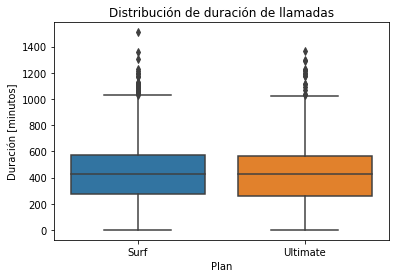

In [74]:
all_arr = [calls_sum_surf,
           calls_sum_ultimate]
sns.boxplot(data=all_arr).set(xlabel='Plan',
                              ylabel = 'Duración [minutos]',
                              xticklabels= ['Surf', 'Ultimate']) 
plt.title('Distribución de duración de llamadas')
plt.show()

Si consideramos los rangos típicos en ambos planes, no se observa mayor diferencia entre los consumos de llamadas, ambos presentan una distribución similar. Cabe notar que esto afectaría en el ingreso que se obtiene por consumos de llamadas, ya que los usuarios de surf, tienen hasta 500 minutos en el plan. Menos de la mitad de los usuarios parece que están pagando por el excedente. En cambio en ultimate, con el límite de 3000 llamadas, ni uno sobrepasa su uso, por lo que el ingreso por exceso de duración de llamadas sería cero.

### 1.6.2. <a id='toc1_6_2_'></a>[Consumo de internet entre usuarios de surf y ultimate](#toc0_)

Vamos a encontrar algunos datos estadísticos del consumo de internet entre surf y ultimate.

In [75]:
internet_sum_surf = users_monthly.query('plan == "surf"')['internet_sum']
internet_sum_ultimate = users_monthly.query('plan == "ultimate"')['internet_sum']

In [76]:
show_basic_stats([internet_sum_surf, internet_sum_ultimate], ['Surf', 'Ultimate'])

                     Surf   Ultimate
Media           16.670693  17.306944
Varianza        61.544449  58.748841
Desv. Estandar   7.845027   7.664779


El comportamiento de uso de internet da un media y desviación estandar similar en ambos planes.

Compararemos visualmente el consumo entre los usuarios de ambos planes.

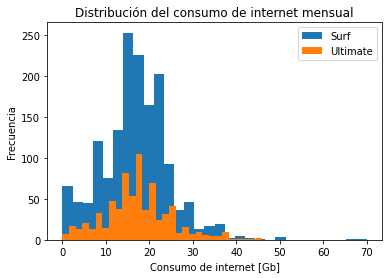

In [77]:
plt.hist(internet_sum_surf, bins=30)
plt.hist(internet_sum_ultimate, bins=30)
plt.legend(['Surf', 'Ultimate'])
plt.xlabel('Consumo de internet [Gb]')
plt.ylabel('Frecuencia')
plt.title('Distribución del consumo de internet mensual')
plt.show()

Sus distribuciones se parece, varía en la frecuencia, siendo el plan de surf mayor por el mayor número de usuarios. Se van a revisar los ceros, la cantidad de meses donde no se usó este servicio.

In [78]:
zero_internet_surf = len(internet_sum_surf[internet_sum_surf==0])
print(f'==Para planes de surf==')
print(f'Cantidad de meses donde no se usó internet: {zero_internet_surf}')
print(f'Esto equivale al {zero_internet_surf/len(internet_sum_surf):.2%} de los datos')
print()
zero_internet_ultimate = len(internet_sum_ultimate[internet_sum_ultimate==0])
print(f'==Para planes de ultimate==')
print(f'Cantidad de meses donde no se usó internet: {zero_internet_ultimate}')
print(f'Esto equivale al {zero_internet_ultimate/len(internet_sum_ultimate):.2%} de los datos')

==Para planes de surf==
Cantidad de meses donde no se usó internet: 15
Esto equivale al 0.95% de los datos

==Para planes de ultimate==
Cantidad de meses donde no se usó internet: 1
Esto equivale al 0.14% de los datos


Son muy pocos los meses donde no se consumen datos, sobretodo con ultimate, donde en apenas un mes no tuvo consumo.

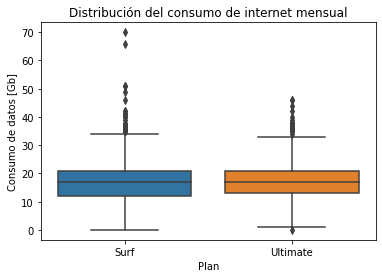

In [79]:
all_arr = [internet_sum_surf,
           internet_sum_ultimate]
sns.boxplot(data=all_arr).set(xlabel='Plan',
                              ylabel = 'Consumo de datos [Gb]',
                              xticklabels= ['Surf', 'Ultimate']) 
plt.title('Distribución del consumo de internet mensual')
plt.show()

La distribución de datos de los consumos entre ambos planes se asemejan, el comportamiento del consumo entre ambos tipos de usuarios es similar. Habría que notar que si se considera que el límite de Gb de los usuarios de Surf es 15 Gb, más de la mitad está pagando un excedente. Para el caso de ultimate, aquí el límite de uso es de 30 Gb, aunque quizás no sean muchos, sí hay un porcentaje que está pagando por mes un excedente. 

### 1.6.3. <a id='toc1_6_3_'></a>[Consumo de mensajes de texto entre usuarios de surf y ultimate](#toc0_)

Vamos a encontrar algunos datos estadísticos del consumo de mensajes entre surf y ultimate.

In [80]:
messages_count_surf = users_monthly.query('plan == "surf"')['messages_count']
messages_count_ultimate = users_monthly.query('plan == "ultimate"')['messages_count']

In [81]:
show_basic_stats([messages_count_surf, messages_count_ultimate], ['Surf', 'Ultimate'])

                       Surf     Ultimate
Media             31.159568    37.551389
Varianza        1126.008232  1207.077915
Desv. Estandar    33.556046    34.743027


El envío de mensajes tiene una desviación estandar similar, aunque la media en ultimate parece mayor. Quizás ellos hacen más consumo de mensajes por mes en comparación a usuarios de surf.

Compararemos visualmente el consumo entre los usuarios de ambos planes.

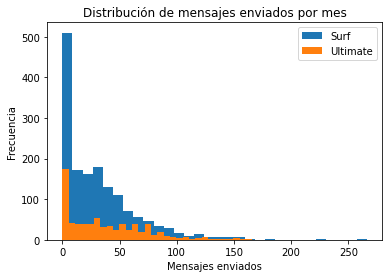

In [82]:
plt.hist(messages_count_surf, bins=30)
plt.hist(messages_count_ultimate, bins=30)
plt.legend(['Surf', 'Ultimate'])
plt.xlabel('Mensajes enviados')
plt.ylabel('Frecuencia')
plt.title('Distribución de mensajes enviados por mes')
plt.show()

De todos los servicios, este parece ser el que por más meses no se usa, vamos a confirmar.

In [83]:
zero_messages_surf = len(messages_count_surf[messages_count_surf==0])
print(f'==Para planes de surf==')
print(f'Cantidad de meses donde no se enviaron mensajes: {zero_messages_surf}')
print(f'Esto equivale al {zero_messages_surf/len(messages_count_surf):.2%} de los datos')
print()
zero_messages_ultimate = len(messages_count_ultimate[messages_count_ultimate==0])
print(f'==Para planes de ultimate==')
print(f'Cantidad de meses donde no se enviaron mensajes: {zero_messages_ultimate}')
print(f'Esto equivale al {zero_messages_ultimate/len(messages_count_ultimate):.2%} de los datos')

==Para planes de surf==
Cantidad de meses donde no se enviaron mensajes: 351
Esto equivale al 22.23% de los datos

==Para planes de ultimate==
Cantidad de meses donde no se enviaron mensajes: 136
Esto equivale al 18.78% de los datos


Alrededor del 20% de los meses no tuvo consumo de mensajes en ambos planes y no es extraño, se ha reducido el uso de sms por las apps de mensajería. 

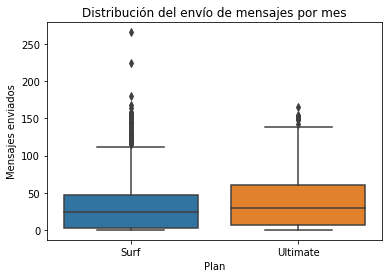

In [84]:
all_arr = [messages_count_surf,
           messages_count_ultimate]
sns.boxplot(data=all_arr).set(xlabel='Plan',
                              ylabel = 'Mensajes enviados',
                              xticklabels= ['Surf', 'Ultimate']) 
plt.title('Distribución del envío de mensajes por mes')
plt.show()

Aunque ambos estés sesgados a la derecha, el rango intercuartir de los datos de ultimate es mayor. El 50% de los datos de surf están distribuídos en un rango más pequeño que de ultimate. Dado que la media y la mediana es más alta en ultimate, el consumo de mensajes parece mayor en este plan comparado con surf, a pesar de los datos átipicos donde en unos meses tuvieron un consumo alto en surf.

Casi el 75% de los meses de surf, se mantieron debajo del límite de 50 mensajes disponibles. Como en ultimate el límite es de 3000 mensajes, de este grupo nadie pagó por exceso de mensajes de texto, en cambio.

### 1.6.4. <a id='toc1_6_4_'></a>[Ingreso de usuarios de surf y ultimate](#toc0_)

Vamos a ver la distribución de los ingresos mensuales tanto para surf como para ultimate

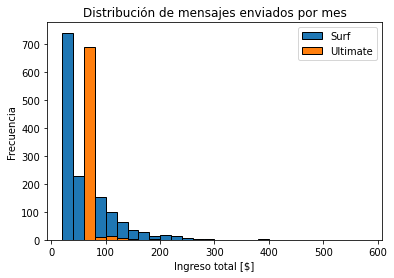

In [85]:
ingreso_total_surf = users_monthly.query('plan == "surf"')['ingreso_total']
ingreso_total_ultimate = users_monthly.query('plan == "ultimate"')['ingreso_total']
plt.hist(ingreso_total_surf, bins=np.array(range(1,30))*20,
         edgecolor='black', linewidth=1)
plt.hist(ingreso_total_ultimate, bins=np.array(range(1,30))*20,
         edgecolor='black', linewidth=1)

plt.legend(['Surf', 'Ultimate'])
plt.xlabel('Ingreso total [$]')
plt.ylabel('Frecuencia')
plt.title('Distribución de mensajes enviados por mes')
plt.show()

La distribución de ingresos está bastante sesgada a la derecha. La gran mayoría de ingresos por meses por cada usuario representa el costo base del plan correspondiente. Esto es aun mucho más obvio con el plan de ultimate, donde la frecuencia de usuarios que pagaron más de $70 en un mes dado, es poco apreciable.

Vamos a calcular cuántos meses pagaron el precio base de cada tarifa.

In [86]:
# ratio de ingresos equivalentes al precio base de surf
len(ingreso_total_surf[ingreso_total_surf==20])/len(ingreso_total_surf)

0.27675744141861935

In [87]:
# ratio de ingresos equivalentes al precio base de ultimate
len(ingreso_total_ultimate[ingreso_total_ultimate==70])/len(ingreso_total_ultimate)

0.9433701657458563

El 27.7% de los pagos fueron por el precio base de surf, por lo que 72.3% de los pagos mensuales tuvieron algún pago excedente. Por otro lado, para ultimate, menos del 6% de los ingresos fueron pagos mayores a \$70, el precio base de ultimate. Al la gran mayoría, le basta y sobra el límite de paquetes.

Vamos a mostrar las medias, varianzas y desviaciones de ambas poblaciones.

In [88]:
show_basic_stats([ingreso_total_surf, ingreso_total_ultimate], ['Surf', 'Ultimate'])

                       Surf    Ultimate
Media             60.551729   72.301105
Varianza        3060.507379  128.981159
Desv. Estandar    55.321853   11.356987


La media en ultimate es más alta comparada a surf, y la desviación estandar es mayor en surf, esto último debido a mayor porcentaje de pagos variados por mes, a diferencia del ultimate donde la gran mayoría paga $70. De llegarse a probar que hay diferencia, entonces se podría decir que ultimate da mayor ingreso en promedio por mes por usuario.

### 1.6.5. <a id='toc1_6_5_'></a>[Ingreso de usuarios del estado de New York/ New Jersey y los demás](#toc0_)

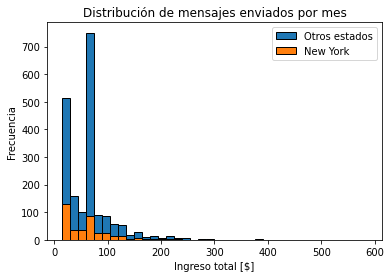

In [89]:
ingreso_total_new_york = users_monthly.query('city == @new_york_city')['ingreso_total']
ingreso_total_no_york = users_monthly.query('city != @new_york_city')['ingreso_total']

plt.hist(ingreso_total_no_york, bins=np.array(range(1,40))*15,
         edgecolor='black', linewidth=1)
plt.hist(ingreso_total_new_york, bins=np.array(range(1,40))*15,
         edgecolor='black', linewidth=1)
plt.legend([ 'Otros estados', 'New York'])
plt.xlabel('Ingreso total [$]')
plt.ylabel('Frecuencia')
plt.title('Distribución de mensajes enviados por mes')
plt.show()

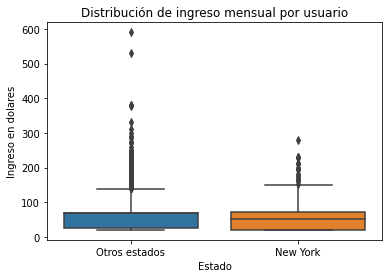

In [90]:
all_arr = [ingreso_total_no_york,
           ingreso_total_new_york]
sns.boxplot(data=all_arr).set(xlabel='Estado',
                              ylabel = 'Ingreso en dolares',
                              xticklabels= [ 'Otros estados', 'New York']) 
plt.title('Distribución de ingreso mensual por usuario')
plt.show()

Los datos de ingresos mensuales por usuario están sesgados a la derecha, con los datos de usuarios que no son de New York con un mayor sesgo, teniendo los datos de ingresos más altos en este grupo. El rango de valores típicos se asemeja, va de 20 hasta 150 dolares aproxidamente.

La mediana de otros estados no se puede apreciar, vamos a calcularla.

In [91]:
np.median(ingreso_total_no_york)

70.0

La mediana ha sido \\$70, Q3 y la mediana tienen el mismo valor, tiene sentido con todos los pagos de \\$70 que hay en el histograma. La mediana de New York es entonces menor, tienen un mayor porcentaje de meses con menor ingreso que \\$70.

Vamos a mostrar las medias, varianzas y desviaciones de ambas poblaciones.

In [92]:
show_basic_stats([ingreso_total_no_york, ingreso_total_new_york], ['Otros estados', 'New York'])

                Otros estados     New York
Media               65.089262    59.948016
Varianza          2219.881380  1885.784365
Desv. Estandar      47.115617    43.425619


Parece que la media y desviación estandar es menor para New York, comparada a otros estados. Vamos a comprobar si la diferencia es lo suficiente para comprobar o no la hipótesis.

### 1.6.6. <a id='toc1_6_6_'></a>[Conclusiones intermedias](#toc0_)

- Hay mayor cantidad de usuarios con plan de surf que con ultimate, 2/3 aproximadamente son de surf.
- El ratio de usuarios del estado de New York representa 1/6 de los datos aproxidamente.
- La distribución de consumos tanto para llamadas e internet no varia mucho comparando entre los consumos de usuarios de surf vs ultimate.
- El consumo de mensajes parece ser mayor en ultimate que surf.
- La medias de los ingresos de surf vs ultimate son distintas, pero se comprobará con la prueba de hipótesis si en verdad difieren.
- La medias de los ingresos de usuarios de New York vs Otros estados es distinta pero no parece por mucho, igual se comprobará con prueba de hipótesis.


## 1.7. <a id='toc1_7_'></a>[Prueba las hipótesis](#toc0_)

Ahora vamos a probar las dos hipótesis:
- El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
- El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

### 1.7.1. <a id='toc1_7_1_'></a>[Primera hipótesis](#toc0_)

Vamos a definir la hipótesis nula, $H_0$ y alternativa, $H_1$.

**$H_0:$** El ingreso promedio de los usuarios de las tarifas Ultimate y Surf **no** difieren.

**$H_1:$** El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difieren.


Vamos a definir nuestro nivel de significancia en un 5%, para tener cierta seguridad de los resultados, ahora vamos a comparar las dos poblaciones de surf y ultimate.

In [93]:
alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

results = st.ttest_ind(ingreso_total_surf, ingreso_total_ultimate, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value:  1.218411585212325e-15
Rechazamos la hipótesis nula


Al rechazar la hipótesis nula, podemos decir con un alto nivel de confianza que las medias de ingresos mensuales de usuarios de surf y ultimate sí son diferentes. El p-value fue muy bajo, es poco probable encontrar esta diferencia o mayor de las medias entre las dos poblaciones. Se puede decir que los ingresos por mes por usuario son mayores con el plan de *Ultimate*.

### 1.7.2. <a id='toc1_7_2_'></a>[Segunda hipótesis](#toc0_)

Vamos a definir la hipótesis nula, $H_0$ y alternativa, $H_1$.

**$H_0:$** El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey **no** es diferente al de los usuarios de otras regiones.

**$H_1:$** El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

Ahora vamos a comparar las dos poblaciones de New York y los otros estados. Asumimos el mismo nivel de significancia de la primera hipótesis.

In [94]:
alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

results = st.ttest_ind(ingreso_total_new_york, ingreso_total_no_york, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value:  0.038703226612928854
Rechazamos la hipótesis nula


Asumiendo el 5% de nivel de significancia, rechazamos la hipótesis nula. Solo hay un 3.9% de probabilidad de elegir muestras con esta o mayor diferencia de medias. Podemos concluir que las medias de ingresos de la poblacion de usuarios de New York compara a los demás estados, son distintas.

### 1.7.3. <a id='toc1_7_3_'></a>[Conclusiones intermedias](#toc0_)

- Se realizó la prueba de hipótesis para las dos hipótesis planteadas.
- Se rechazó la hipótesis que afirma igualdad entre las medias de ingresos de surf y ultimate. Ultimate tiene mayor ingreso por usuario por mes.
- También se rechazó la segunda hipótesis, por lo que las medias de las poblaciones de New York vs el resto, sí son distintas.

## 1.8. <a id='toc1_8_'></a>[Conclusiones generales](#toc0_)

- Se reemplazaron los datos ausentes de `churn_date` en `users_data` por una fecha del 2019.
- Se cambiaron los tipos de datos de fechas a datetime.
- Para la tabla de plans_data, se estableción el nombre del plan como el índice.
- Se crearon tablas dinámicas con los consumos por mes de cada usuario para cada servicio.
- Estas tablas de consumo se unieron con `users_data`, para luego calcular los ingresos según el plan.
- Se obtuvo el ingreso mensual del excedente por cada servicio para cada usuario por mes, a partir del uso sobre el límite de los paquetes de llamadas, internet y mensajes de texto, considerando los límites de cada tarifa.
- Se calculó el ingreso total por cada usuario por mes, al sumar el ingreso base con el ingreso por excedente de cada servicio.
- El comportamiento de consumo de llamadas e internet se asemejan entre ambos planes, pero para mensajes envíados, parece que tienden a enviar más los usuarios con ultimate.
- Se comparó la población de ingresos promedios de usuarios de surf y usuarios de ultimate si son iguales.
    - Se rechazó la hipótesis nula, se puede decir que son diferentes con un alto nivel de confianza. Además, Ultimate parece ser el plan con mayor ingreso por mes por usuario.
- Se comparó la población de ingresos promedios de usuarios la región de New York con respecto a otras regiones para comprobar si son iguales.
    - Se rechazó la hipótesis nula, con un 5% de confianza, se puede decir que son diferentes las medias de los ingresos entre estas dos poblaciones.
